<a href="https://colab.research.google.com/github/heinercg/MLworkshop/blob/main/Clasificacion_de_Digitos_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificando digitos usando SVM

In [1]:
# Importar librerias
import matplotlib.pyplot as plt

# Importar sklearn, dataset y metricas
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split


# Conjunto de datos de dígitos
El conjunto de datos de dígitos consta de imágenes de dígitos de 8 x 8 píxeles. El atributo de imágenes del conjunto de datos almacena matrices de 8 x 8 valores en escala de grises para cada imagen. Usaremos estas matrices para visualizar las primeras 4 imágenes. El atributo de destino del conjunto de datos almacena el dígito que representa cada imagen y esto se incluye en el título de los 4 gráficos a continuación.

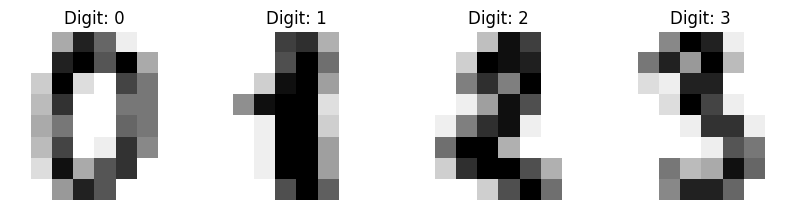

In [3]:
#Cargar los digitos desde el dataset
digits = datasets.load_digits()

#Mostrar los primeros digitos del dataset
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Digit: %i" % label)

# Clasificación

Para aplicar un clasificador a estos datos, necesitamos aplanar las imágenes, convirtiendo cada matriz 2D de valores de escala de grises de forma (8, 8) a la forma de una fila (64,). Posteriormente, todo el conjunto de datos tendrá la forma (n_muestras, n_características), donde n_muestras es la cantidad de imágenes y n_características es la cantidad total de píxeles en cada imagen.

Luego, podemos dividir los datos en subconjuntos de prueba, validación y de entrenamiento y ajustar un clasificador de vectores de soporte a las muestras de entrenamiento. El clasificador ajustado se puede utilizar posteriormente para predecir el valor del dígito para las muestras en el subconjunto de prueba.

In [16]:
# Pasar las imagenes 2D a una sola fila
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


# Dividir los datos en 80% para entrenamiento/validation y 20% para pruebas
X_train_val, X_test, y_train_val, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False,
)

#Volver a dividir el 80% en entrenamiento 60% y 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, shuffle=False,
)

# Crear un clasificador: un clasificador de vector soporte

clf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0,
              shrinking=True, probability=False, tol=0.001, cache_size=200,
              class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',
              break_ties=False, random_state=42)

# Aprender los dígitos en el subconjunto de entrenamiento
clf.fit(X_train, y_train)

# Predecir el valor del dígito en el subconjunto de validación
predicted_val = clf.predict(X_val)

A continuación visualizamos las primeras 4 muestras de prueba y mostramos su valor de dígito previsto en el título.

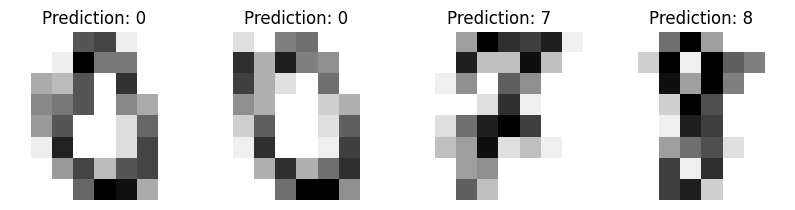

In [17]:
#Ver las predicciones
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_val, predicted_val):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [18]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_val, predicted_val)}\n"
)

Classification report for classifier SVC(kernel='linear', random_state=42):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.92      0.96        37
           2       1.00      0.94      0.97        36
           3       0.95      0.95      0.95        37
           4       1.00      0.97      0.99        37
           5       0.94      0.97      0.96        34
           6       0.97      1.00      0.99        37
           7       0.95      0.97      0.96        36
           8       0.89      0.94      0.92        35
           9       1.00      0.97      0.99        34

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360




También podemos trazar una matriz de confusión de los valores de los dígitos verdaderos y los valores de los dígitos previstos.

Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  3  0]
 [ 0  0 34  2  0  0  0  0  0  0]
 [ 0  0  0 35  0  1  0  1  0  0]
 [ 1  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 33  1  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 35  1  0]
 [ 0  0  0  0  0  1  0  1 33  0]
 [ 1  0  0  0  0  0  0  0  0 33]]


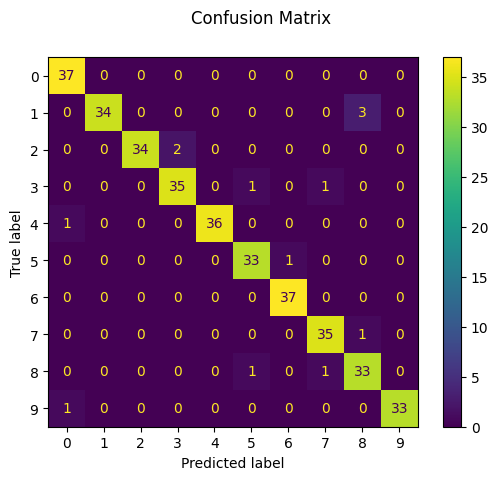

In [19]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_val, predicted_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Por último probamos el modelo subconjunto de testeo

In [20]:
# Predecir el valor del dígito en el subconjunto de validación
predicted_test = clf.predict(X_test)

# Imprimir las metricas
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted_test)}\n"
)

Classification report for classifier SVC(kernel='linear', random_state=42):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.88      0.83      0.86        36
           2       1.00      0.97      0.99        35
           3       0.93      0.70      0.80        37
           4       1.00      0.92      0.96        37
           5       0.90      1.00      0.95        37
           6       0.97      0.97      0.97        37
           7       0.89      0.94      0.92        36
           8       0.78      0.88      0.83        33
           9       0.79      0.89      0.84        37

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weighted avg       0.91      0.91      0.91       360




Confusion matrix:
[[34  0  0  0  0  0  1  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  6]
 [ 1  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  2  0  2  7  0]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  1  0  0  0  0  0 34  1  0]
 [ 0  2  0  1  0  0  0  1 29  0]
 [ 0  0  0  1  0  2  0  1  0 33]]


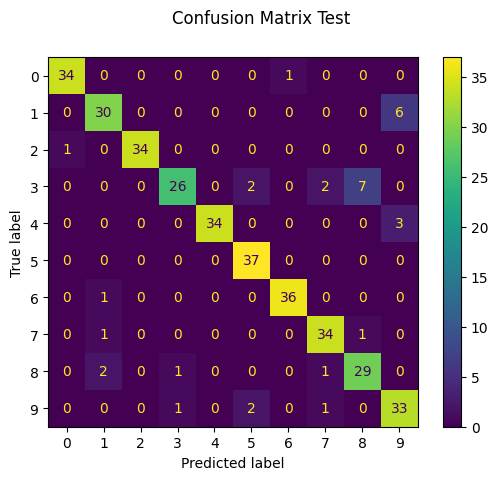

In [21]:
# Matriz de confusión para el testeo
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_test)
disp.figure_.suptitle("Confusion Matrix Test")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()